In [30]:
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
folder_name = "JST_PSF0_us2_sigma_002"

In [32]:
!python main.py --ni --config deblur_us2.yml --doc imagenet_ood --timesteps 40 --eta 0.85 --etaB 1 --deg deblur_bccb --sigma_0 30 -i {folder_name}

Module path: /projects/minds/PDAS-M2-2025/DDPM
Current sys.path: ['/projects/minds/PDAS-M2-2025/Stable_DDRM', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/home/pdas/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/nvfuser-0.1.4a0+d0bb811-py3.10-linux-x86_64.egg', '/usr/lib/python3/dist-packages', '/projects/minds/PDAS-M2-2025/DDPM']
File not found: /projects/minds/PDAS-M2-2025/DDPM/denoising_diffusion_pytorch.py
Import failed: No module named 'denoising_diffusion_pytorch'
INFO - main.py - 2025-06-02 12:22:09,590 - Using device: cuda
INFO - main.py - 2025-06-02 12:22:09,591 - Writing log file to exp/logs/imagenet_ood
INFO - main.py - 2025-06-02 12:22:09,591 - Exp instance id = 2346471
INFO - main.py - 2025-06-02 12:22:09,591 - Exp comment = 
building dataset from exp/deblur_us2.txt
read meta done
Start from 0
  0%|                                                     | 0/1 [0

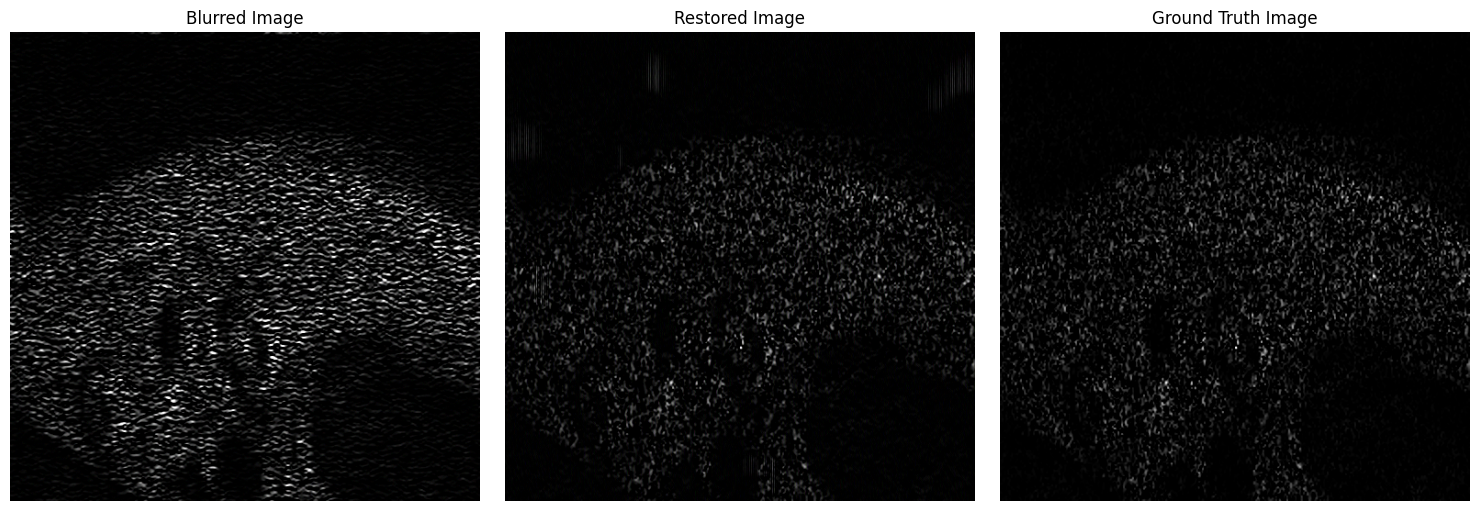

In [33]:

# Specify the paths to your image files
image_path_restored = 'exp/image_samples/'+folder_name+'/0_-1.png'
image_path_GT = 'exp/image_samples/'+folder_name+'/orig_0.png'
image_path_blurred = 'exp/image_samples/'+folder_name+'/y0_0.png'

# Create a figure to hold the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# List of images and titles
images = [(image_path_blurred, "Blurred Image"),
          (image_path_restored, "Restored Image"),
          (image_path_GT, "Ground Truth Image")]

# Loop through the images and display them
for ax, (image_path, title) in zip(axes, images):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(title)

plt.tight_layout()  # Adjust layout
plt.show()




In [5]:
from scipy.io import loadmat, savemat
from scipy.signal import hilbert
import numpy as np

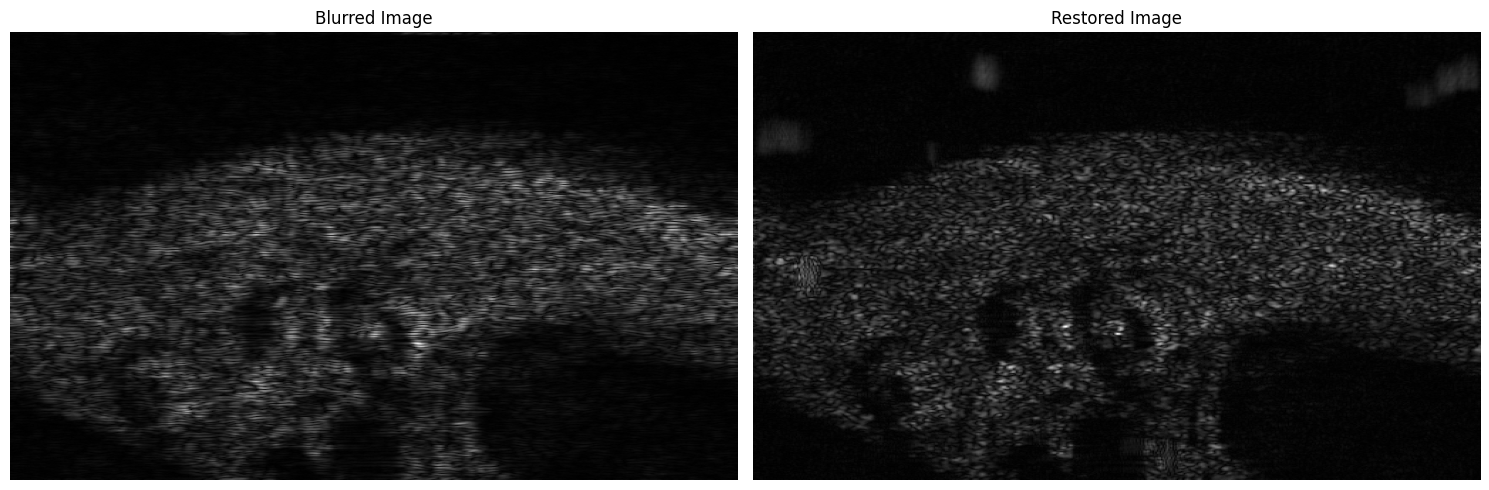

In [6]:
image_path_restored = 'exp/image_samples/'+folder_name+'/0_-1.mat'
image_path_blurred = 'exp/image_samples/'+folder_name+'/y0_0.mat'

# Create a figure to hold the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 3 columns

img = loadmat(image_path_blurred)['image']
ax = axes[0]
img = np.transpose(img, ([1, 2, 0]))
img = np.log(np.abs(hilbert(img[:,:,1]))+10)
ax.imshow(img,cmap='gray')
ax.set_aspect('auto')  
ax.axis('off')  # Hide axes
ax.set_title("Blurred Image")

img = loadmat(image_path_restored)['image']
ax = axes[1]
img = np.transpose(img, ([1, 2, 0]))
img = np.log(np.abs(hilbert(img[:,:,1]))+10)
ax.imshow(img,cmap='gray')
ax.set_aspect('auto')  
ax.axis('off')  # Hide axes
ax.set_title("Restored Image")


'''
# List of images and titles
images = [(image_path_blurred, "Blurred Image"),
          (image_path_restored, "Restored Image")]
# Loop through the images and display them
for ax, (image_path, title) in zip(axes, images):
    img = loadmat(image_path)['image']
    img = np.transpose(img, ([1, 2, 0]))
    img = np.log(np.abs(hilbert(img[:,:,1]))+100000)
    ax.imshow(img,cmap='gray')
    ax.axis('off')  # Hide axes
    ax.set_title(title)'''

plt.tight_layout()  # Adjust layout
plt.show()

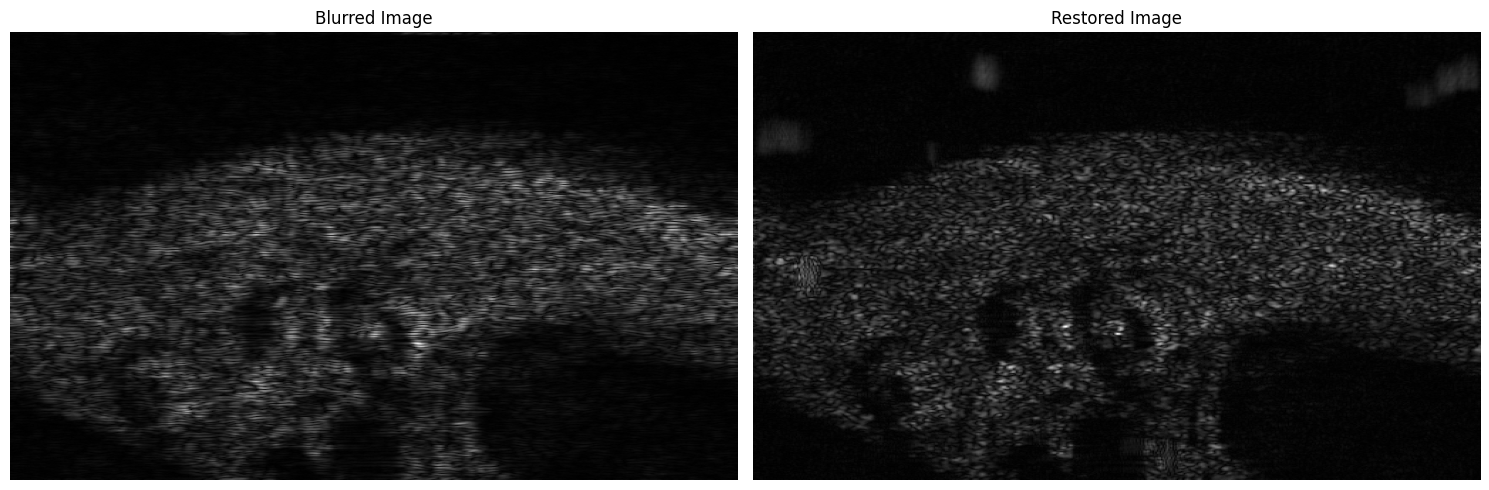

In [7]:
from scipy.io import loadmat
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# Set paths
image_path_restored = 'exp/image_samples/' + folder_name + '/0_-1.mat'
image_path_blurred = 'exp/image_samples/' + folder_name + '/y0_0.mat'

# Create figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ---------- Blurred Image ----------
img_blurred = loadmat(image_path_blurred)['image']
img_blurred = np.transpose(img_blurred, (1, 2, 0))
env_blurred = np.abs(hilbert(img_blurred[:, :, 1]))
log_env_blurred = np.log(env_blurred + 10)

axes[0].imshow(log_env_blurred, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Blurred Image")
axes[0].set_aspect('auto')

# ---------- Restored Image ----------
img_restored = loadmat(image_path_restored)['image']
img_restored = np.transpose(img_restored, (1, 2, 0))
env_restored = np.abs(hilbert(img_restored[:, :, 1]))
log_env_restored = np.log(env_restored + 10)

axes[1].imshow(log_env_restored, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Restored Image")
axes[1].set_aspect('auto')

plt.tight_layout()
plt.show()


In [10]:
folder_name = "DDRM_PSF0_us2_sigma_002"

In [11]:
!python main.py --ni --config deblur_us2.yml --doc imagenet_ood --timesteps 20 --eta 0.85 --etaB 1 --deg deblur_aniso --sigma_0 30 -i {folder_name}

Module path: /projects/minds/PDAS-M2-2025/DDPM
Current sys.path: ['/projects/minds/PDAS-M2-2025/Stable_DDRM', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/home/pdas/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/nvfuser-0.1.4a0+d0bb811-py3.10-linux-x86_64.egg', '/usr/lib/python3/dist-packages', '/projects/minds/PDAS-M2-2025/DDPM']
File not found: /projects/minds/PDAS-M2-2025/DDPM/denoising_diffusion_pytorch.py
Import failed: No module named 'denoising_diffusion_pytorch'
INFO - main.py - 2025-05-26 17:59:42,557 - Using device: cuda
INFO - main.py - 2025-05-26 17:59:42,558 - Writing log file to exp/logs/imagenet_ood
INFO - main.py - 2025-05-26 17:59:42,558 - Exp instance id = 298534
INFO - main.py - 2025-05-26 17:59:42,558 - Exp comment = 
building dataset from exp/deblur_us2.txt
read meta done
Start from 0
  0%|                                                     | 0/1 [00

OG


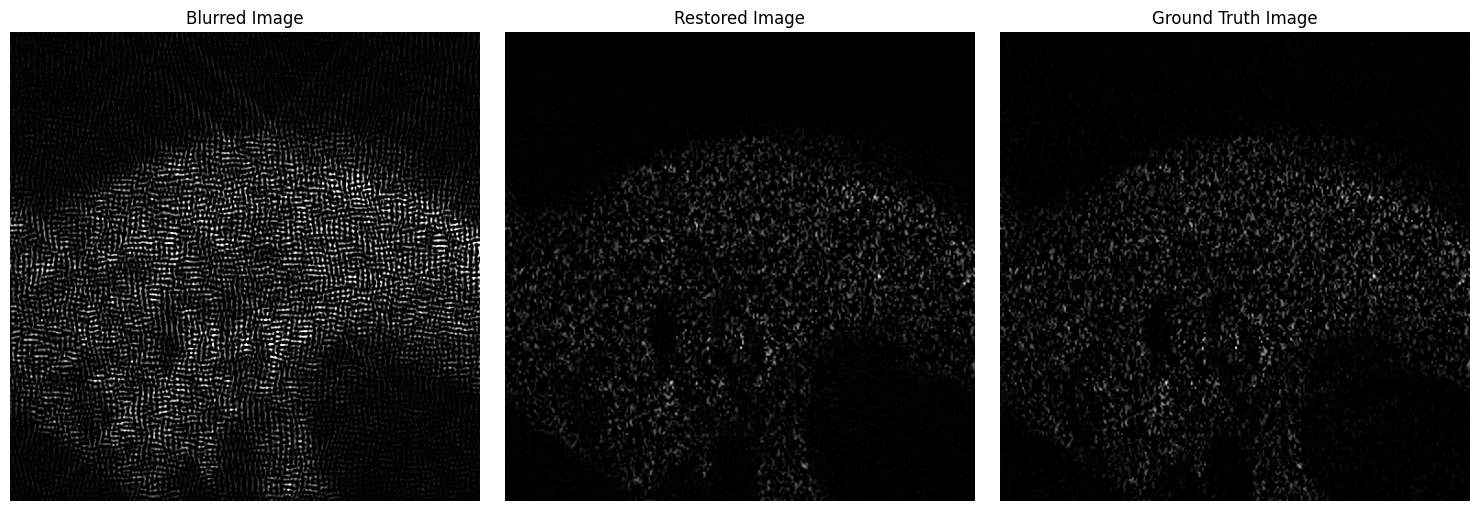

In [16]:
print('OG')
# Specify the paths to your image files
image_path_restored = 'exp/image_samples/'+folder_name+'/0_-1.png'
image_path_GT = 'exp/image_samples/'+folder_name+'/orig_0.png'
image_path_blurred = 'exp/image_samples/'+folder_name+'/y0_0.png'

# Create a figure to hold the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# List of images and titles
images = [(image_path_blurred, "Blurred Image"),
          (image_path_restored, "Restored Image"),
          (image_path_GT, "Ground Truth Image")]

# Loop through the images and display them
for ax, (image_path, title) in zip(axes, images):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(title)

plt.tight_layout()  # Adjust layout
plt.show()



# Simu Data 1

In [1]:
!ls exp/datasets/MyRF

GT_rf.mat  psf_ref.mat	y0.mat


In [2]:
import scipy.io, os, numpy as np, pathlib

folder = pathlib.Path("exp/datasets/MyRF")
for fname in ["GT_rf.mat", "psf_ref.mat", "y0.mat"]:
    fpath = folder / fname
    mat   = scipy.io.loadmat(fpath)
    keys  = [k for k in mat.keys() if not k.startswith("__")]
    if keys == ["data"]:
        print(f"✔ {fname} already OK")
    else:
        # pick the first non-meta key and rewrite
        print(f"⏳ fixing {fname} (old key {keys[0]}) → 'data'")
        scipy.io.savemat(fpath, {"data": mat[keys[0]].astype(np.float32)})
print("✓ All .mat files now contain key 'data'")


✔ GT_rf.mat already OK
✔ psf_ref.mat already OK
✔ y0.mat already OK
✓ All .mat files now contain key 'data'


In [3]:
import scipy.io

mat = scipy.io.loadmat("exp/datasets/MyRF/GT_rf.mat")
print("GT_rf keys:", mat.keys())

mat = scipy.io.loadmat("exp/datasets/MyRF/psf_ref.mat")
print("psf_ref keys:", mat.keys())

mat = scipy.io.loadmat("exp/datasets/MyRF/y0.mat")
print("y0 keys:", mat.keys())


GT_rf keys: dict_keys(['__header__', '__version__', '__globals__', 'data'])
psf_ref keys: dict_keys(['__header__', '__version__', '__globals__', 'data'])
y0 keys: dict_keys(['__header__', '__version__', '__globals__', 'data'])


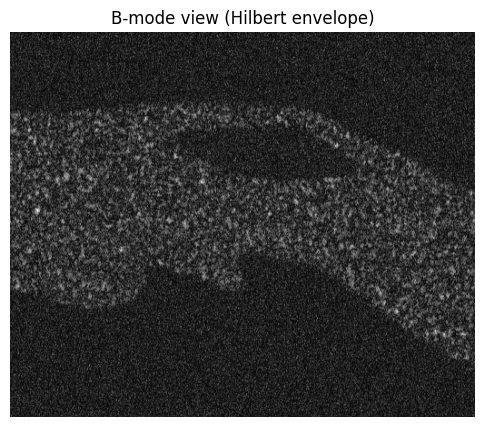

In [8]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from pathlib import Path

# ------------------------------------------------------------
# 1.  Load RF ground-truth
# ------------------------------------------------------------
mat_path = Path(
    "exp/datasets/MyRF/y0.mat"
)
mat = scipy.io.loadmat(mat_path)
rf = mat["data"].astype(np.float32)    # key is 'data'


# ------------------------------------------------------------
# 3.  Optional B-mode view (Hilbert envelope)
# ------------------------------------------------------------
env = np.abs(hilbert(rf, axis=0))
bmode = np.log(env + 200)

plt.figure(figsize=(6, 5))
plt.imshow(bmode, cmap="gray", aspect="auto")
plt.title("B-mode view (Hilbert envelope)")
plt.axis("off")
plt.show()


In [9]:
import os
folder = "exp/datasets/MyRF"
mat_files = [f for f in os.listdir(folder) if f.endswith(".mat")]
with open("exp/MyRF.txt", "w") as f:
    for name in mat_files:
        f.write(name + "\n")
print("✔ MyRF.txt generated with", len(mat_files), "entries")


✔ MyRF.txt generated with 3 entries


In [10]:
print(rf.shape)

(512, 512)


In [11]:
import scipy.io

mat = scipy.io.loadmat("exp/datasets/data-Anes.mat/simu/1/data.mat")
print("GT_rf keys:", mat.keys())


GT_rf keys: dict_keys(['__header__', '__version__', '__globals__', 'GT_rf', 'PSF_estim', 'bmode', 'bmode_GT', 'psf_ref', 'rf'])


In [12]:
import scipy.io
import os

# Load the original .mat file
mat_path = "exp/datasets/data-Anes.mat/simu/2/data.mat"
mat_data = scipy.io.loadmat(mat_path)

# Extract required variables
GT_rf = mat_data['GT_rf']
psf_ref = mat_data['psf_ref']

# Create output directory
output_dir = "rf"
os.makedirs(output_dir, exist_ok=True)

# Save GT_rf and psf_ref separately
scipy.io.savemat(os.path.join(output_dir, "GT_rf.mat"), {'data': GT_rf})
scipy.io.savemat(os.path.join(output_dir, "psf_ref.mat"), {'data': psf_ref})

print("✅ Saved GT_rf.mat and psf_ref.mat in 'rf/' folder.")


✅ Saved GT_rf.mat and psf_ref.mat in 'rf/' folder.


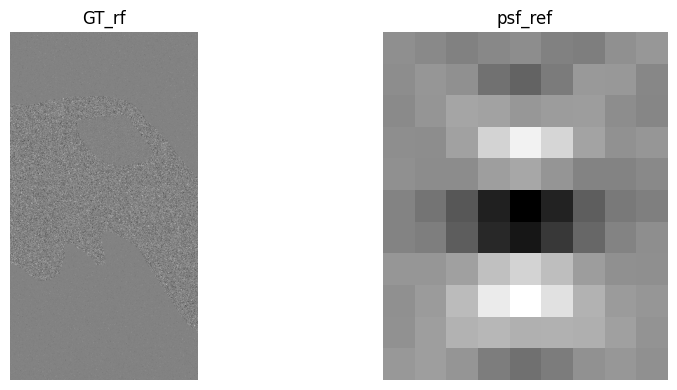

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(GT_rf, cmap='gray')
plt.title("GT_rf")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(psf_ref, cmap='gray')
plt.title("psf_ref")
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
folder_name = "Anes_Simu1_it50sigma10"

In [58]:
!python main.py --ni --config deblur_myRF.yml --doc imagenet_ood --timesteps 50 --eta 0.85 --etaB 1 --deg deblur_bccb --sigma_0 10 -i {folder_name}

Module path: /projects/minds/PDAS-M2-2025/DDPM
Current sys.path: ['/projects/minds/PDAS-M2-2025/Stable_DDRM', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/home/pdas/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/nvfuser-0.1.4a0+d0bb811-py3.10-linux-x86_64.egg', '/usr/lib/python3/dist-packages', '/projects/minds/PDAS-M2-2025/DDPM']
File not found: /projects/minds/PDAS-M2-2025/DDPM/denoising_diffusion_pytorch.py
Import failed: No module named 'denoising_diffusion_pytorch'
INFO - main.py - 2025-06-02 17:56:43,760 - Using device: cuda
INFO - main.py - 2025-06-02 17:56:43,761 - Writing log file to exp/logs/imagenet_ood
INFO - main.py - 2025-06-02 17:56:43,761 - Exp instance id = 554324
INFO - main.py - 2025-06-02 17:56:43,761 - Exp comment = 
building dataset from exp/MyRF.txt
read meta done
Start from 0
  0%|                                                     | 0/1 [00:00<?,

In [59]:
!ls exp/image_samples/RF_Data/

0_-1.mat  0_-1.png  orig_0.png	psnr_values.mat  y0_0.mat  y0_0.png


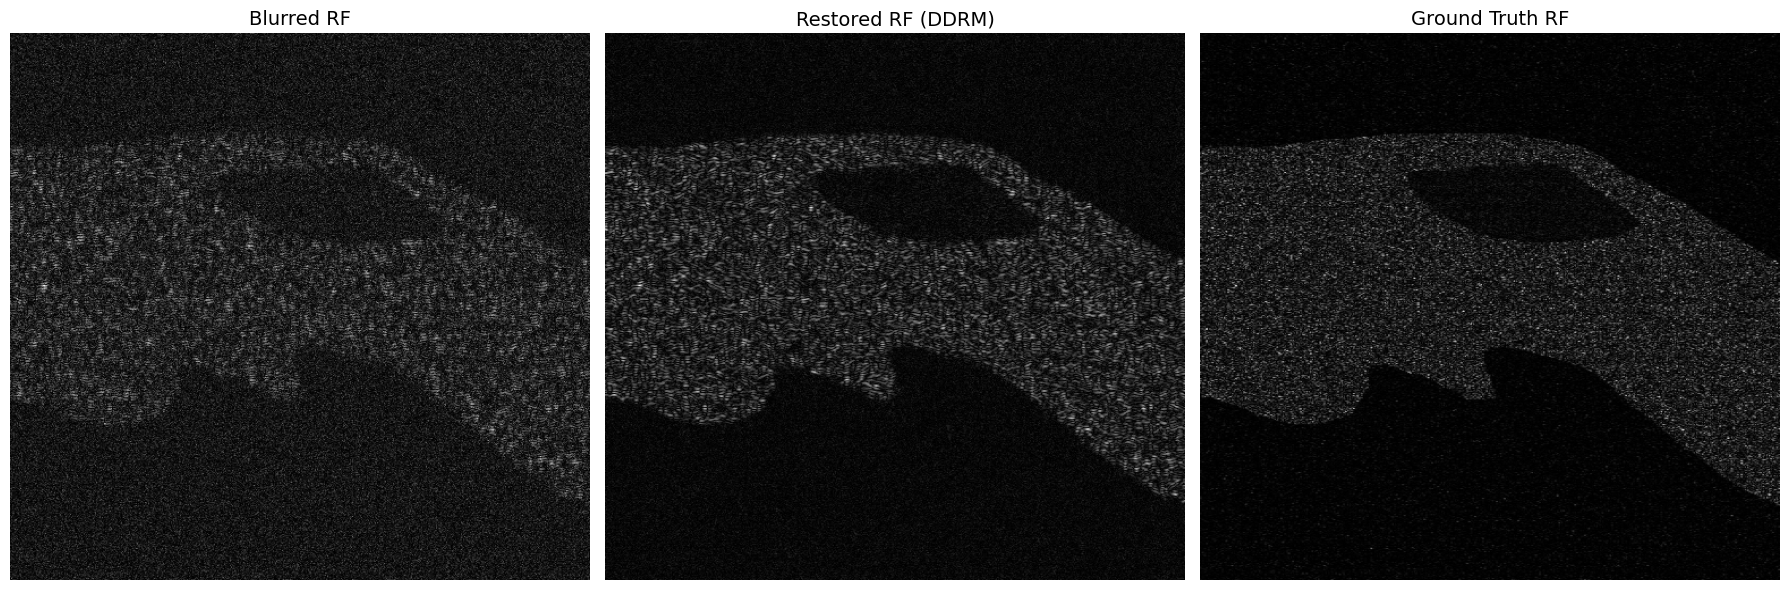

In [60]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ----------- Setup -----------
folder_name = "RF_Data"
base_path = Path("exp/image_samples") / folder_name

# ----------- Log-compress Function -----------
LogB = 10
def log_compress(mat):
    return np.log(np.abs(mat) + LogB)

# ----------- Load Blurred RF -----------
rf_blurred = scipy.io.loadmat("exp/datasets/MyRF/y0.mat")["data"].astype(np.float32)

# ----------- Load and Process Restored RF from 0_-1.mat -----------
rest_mat = scipy.io.loadmat(base_path / "0_-1.mat")
arr = rest_mat["image"]
arr = np.squeeze(arr)
if arr.ndim == 3:
    arr = arr[0, ...]
rf_restored = arr.astype(np.float32)



# ----------- Load Ground Truth RF -----------
rf_gt = scipy.io.loadmat("exp/datasets/MyRF/GT_rf.mat")["data"].astype(np.float32)

# ----------- Prepare Titles and Images -----------
titles = ["Blurred RF", "Restored RF (DDRM)", "Ground Truth RF"]
images = [
    log_compress(rf_blurred),
    log_compress(rf_restored),
    log_compress(rf_gt)
]

# ----------- Plot Side-by-Side -----------
plt.figure(figsize=(18, 6))
for i, (img, title) in enumerate(zip(images, titles)):
    ax = plt.subplot(1, 3, i + 1)
    ax.imshow(img, cmap="gray", aspect="auto")
    ax.set_title(title, fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

